In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Generate Input and Output Data
x = np.arange(0.1, 1.0, 1/22)
y = (1 + 0.6 * np.sin(2 * np.pi * x / 0.7)) + 0.3 * np.sin(2 * np.pi * x)
y /= 2  # Normalize the output

# Define RBF Parameters
c1, r1 = 0.3, 0.1  # Center and radius for the first RBF
c2, r2 = 0.7, 0.1  # Center and radius for the second RBF


In [3]:
# Step 3: Calculate RBF Outputs
def rbf(x, c, r):
    return np.exp(-((x - c) ** 2) / (2 * r ** 2))

# Calculate outputs for each RBF
phi1 = rbf(x, c1, r1)
phi2 = rbf(x, c2, r2)

# Combine RBF outputs into a design matrix
Phi = np.vstack([phi1, phi2]).T

In [4]:
# Step 4: Train the RBF Network
# Using the least squares method to calculate weights  y = w1 * phi1 + w2 * phi2 + w0
# We can rewrite it as: Y = W * Phi.T

# Add a bias term (ones) to the design matrix
Phi = np.hstack([Phi, np.ones((Phi.shape[0], 1))])

# Calculate weights (w1, w2, w0) using the pseudoinverse
W = np.linalg.pinv(Phi) @ y

# Step 5: Approximation
y_pred = Phi @ W


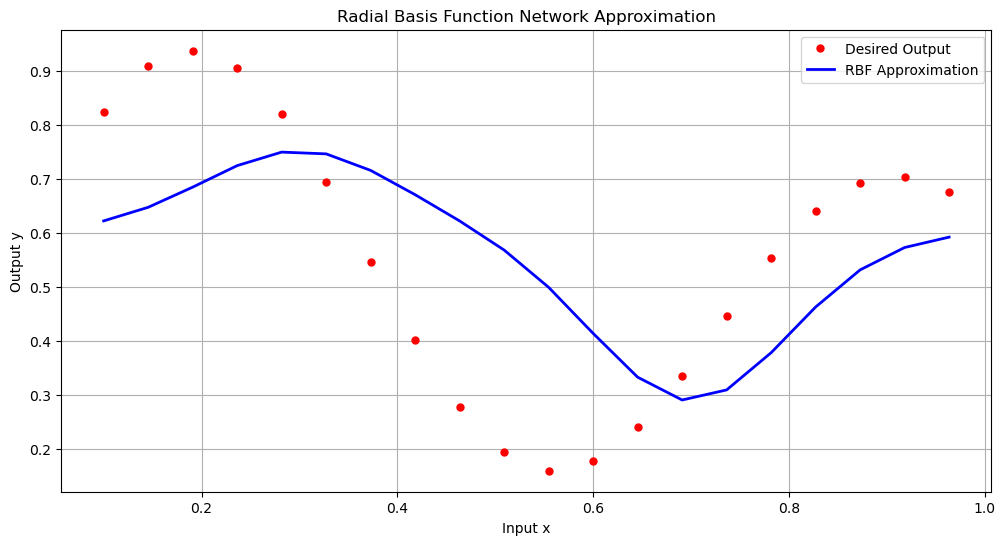

Learned Weights: w1 = 0.15002369853649822, w2 = -0.3122120889145565, w0 = 0.6017263884529033


In [5]:
# Step 6: Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'ro', label='Desired Output', markersize=5)
plt.plot(x, y_pred, 'b-', label='RBF Approximation', linewidth=2)
plt.title('Radial Basis Function Network Approximation')
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.legend()
plt.grid()
plt.show()

# Output the learned weights
w1, w2, w0 = W[0], W[1], W[2]
print(f"Learned Weights: w1 = {w1}, w2 = {w2}, w0 = {w0}")